<a href="https://colab.research.google.com/github/ajaythakur3369/Growintern/blob/main/Task_2_Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - Car Price Predictor**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Submitted To - Growintern**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/Growintern/blob/main/Task_2_Car_Price_Predictor.ipynb)**
## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/1CjbRZ0hVwS3jdanZHoQffexoArwhFEht)**





# **Problem Statement -**

Build a prediction project in machine learning that leverages historical car sales data, vehicle features, and regression algorithms to estimate the market value of cars.

# **Let's Begin !**

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
#plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load data
dataset = pd.read_csv('/content/drive/MyDrive/folders/car data.csv')
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Feature Extraction**

Two features Year and Car_Name were modified to Driving_Age which denotes how many years this vehicle has been used. And Brand represents the individual brands the vehicle is from.

In [6]:
dataset['Driving_Age'] = 2023 - dataset['Year']
dataset.drop('Year', axis = 1, inplace = True)

In [7]:
def extract_brand(car_name):

# Split the car name by space and take the first part as the brand
    return car_name.split()[0]

# Apply the function to create a new 'Brand' column
dataset['Brand'] = dataset['Car_Name'].apply(extract_brand)

dataset.drop('Car_Name', axis = 1, inplace = True)

In [8]:
# Renaming columns
dataset.rename(columns = {'Selling_Price':'Selling_Price(lacs)', 'Present_Price':'Present_Price(lacs)', 'Owner':'Past_Owners'}, inplace = True)

In [9]:
dataset.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Driving_Age,Brand
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9,ritz
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10,sx4
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6,ciaz
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12,wagon
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9,swift


**Exploratory Data Analysis (EDA)**

Here we have visualized the data with three types of plots: box, count, and distribution. From the box plots, we can see the outliers. However, removing the outliers doesn't perform well in the evaluation.

**Univariate Analysis**

**Count Plot**

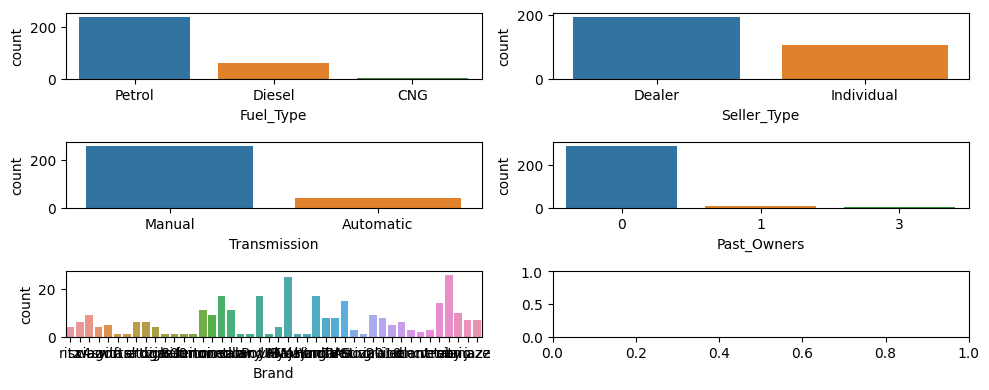

In [10]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Brand']

fig, axes = plt.subplots(3, 2, figsize = (10, 4))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the categorical columns and create count plots
for i in range(len(cat_cols)):
    sns.countplot(x = cat_cols[i], data = dataset, ax = axes[i])

plt.tight_layout()
plt.show()

**Box Plot**

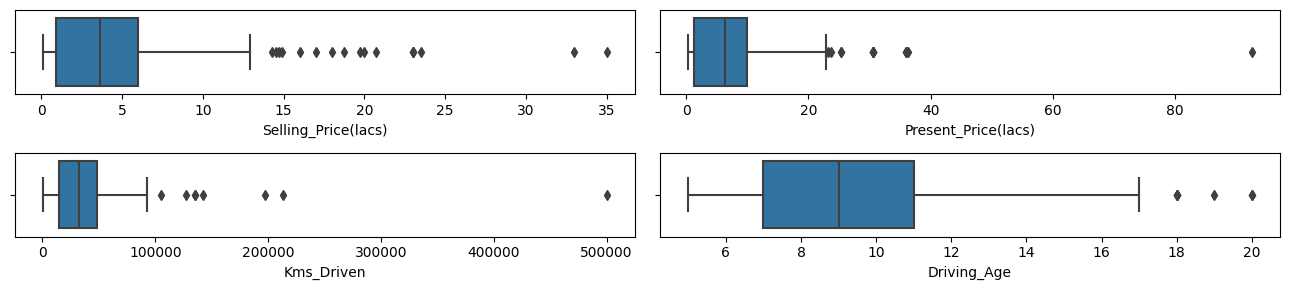

In [11]:
num_cols = ['Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven', 'Driving_Age']

fig, axes = plt.subplots(2, 2, figsize = (13, 3))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the categorical columns and create count plots
for i in range(len(cat_cols)):
    if i < len(axes):
        sns.boxplot(x = num_cols[i], data = dataset, ax = axes[i])

plt.tight_layout()
plt.show()

**Distribution Plot**

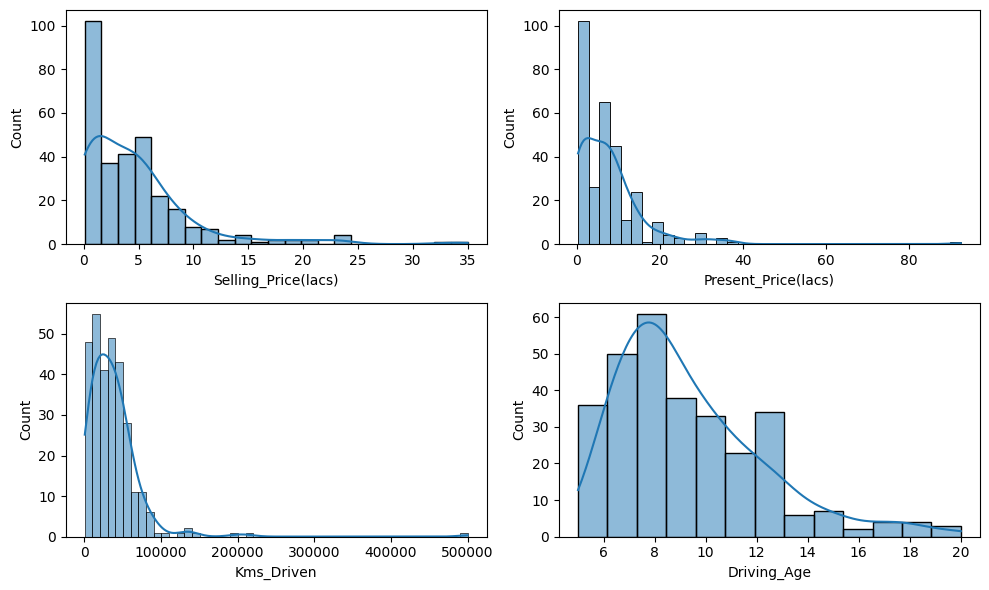

In [12]:
# Distribution plot
num_cols = ['Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven', 'Driving_Age']

fig, axes = plt.subplots(2, 2, figsize = (10, 6))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the numerical columns and create distribution plots
for i in range(len(num_cols)):
# Use 'sns.histplot' for distribution plots
    sns.histplot(dataset[num_cols[i]], ax = axes[i], kde = True)

plt.tight_layout()
plt.show()

**Label Encoding**

All the categorical features are converted to numeric features

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()

In [15]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Brand']
for column in cat_cols:
    dataset[column] = encoder.fit_transform(dataset[column])

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Selling_Price(lacs)  301 non-null    float64
 1   Present_Price(lacs)  301 non-null    float64
 2   Kms_Driven           301 non-null    int64  
 3   Fuel_Type            301 non-null    int64  
 4   Seller_Type          301 non-null    int64  
 5   Transmission         301 non-null    int64  
 6   Past_Owners          301 non-null    int64  
 7   Driving_Age          301 non-null    int64  
 8   Brand                301 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.3 KB


**Bibariate/Multi-Variate Analysis**

**Correlation**

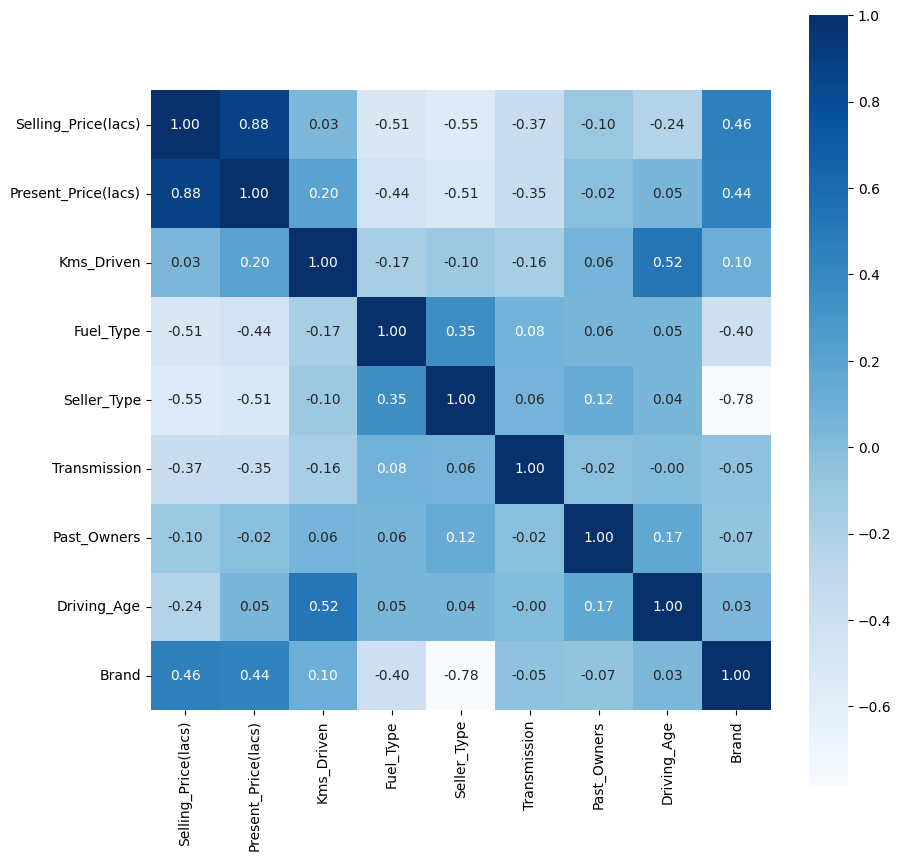

In [17]:
corr = dataset.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, cmap = 'Blues', annot = True, square = True, fmt = '.2f')
plt.show()

In [18]:
corr['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878983
Kms_Driven             0.029187
Fuel_Type             -0.509467
Seller_Type           -0.550724
Transmission          -0.367128
Past_Owners           -0.096487
Driving_Age           -0.236141
Brand                  0.462362
Name: Selling_Price(lacs), dtype: float64

In [19]:
# Data split to features and Label
X = dataset.drop('Selling_Price(lacs)', axis = 1)
y = dataset['Selling_Price(lacs)']

**Feature Transformation**

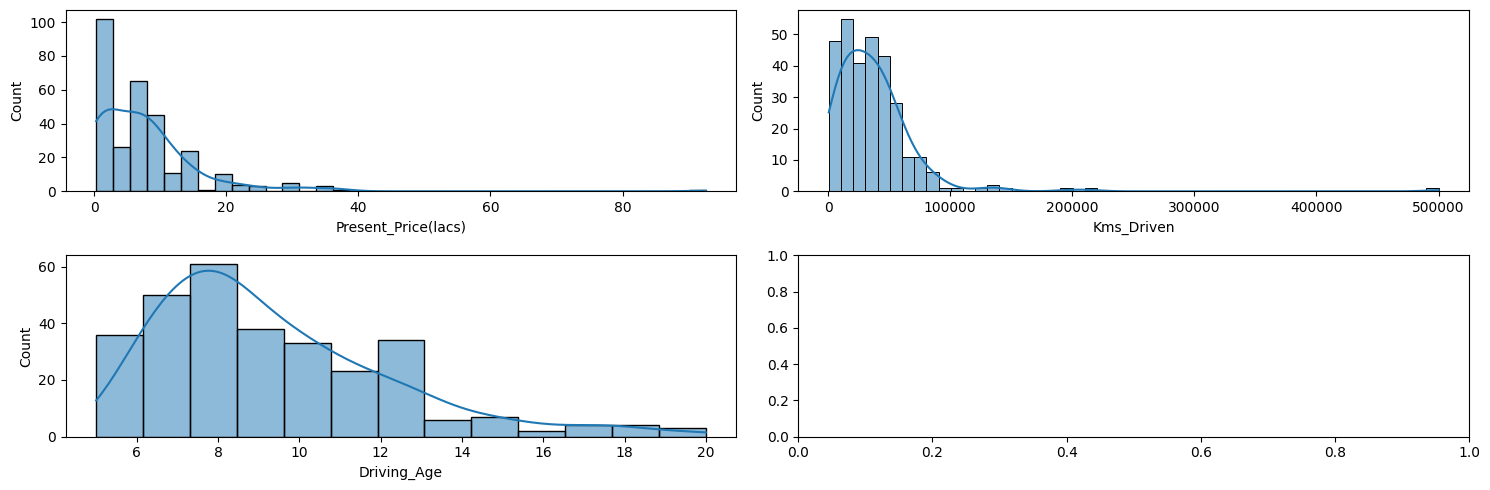

In [20]:
# Distribution plot
num_cols = ['Present_Price(lacs)', 'Kms_Driven', 'Driving_Age']

fig, axes = plt.subplots(2, 2, figsize = (15, 5))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the numerical columns and create distribution plots
for i in range(len(num_cols)):
  # Use sns.histplot for distribution plots
    sns.histplot(X[num_cols[i]], ax = axes[i], kde = True)

plt.tight_layout()
plt.show()

**Feature and Label Split**

In [21]:
# Select only continuous data
col_num = ['Present_Price(lacs)', 'Kms_Driven', 'Driving_Age']
X_num = X[col_num]
X_num.shape

(301, 3)

**Z-score using StandardScaler**

In [22]:
# Normalization z-score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_num)

column_names = ['Present_Price(lacs)', 'Kms_Driven', 'Driving_Age']
X_nnorm = pd.DataFrame(X_norm, columns=column_names)

**Log transformation**

In [23]:
# Applying a natural logarithm (base e) transformation
X_num['Driving_Age'] = np.log(X_num['Driving_Age'])
X_num['Present_Price(lacs)'] = np.log(X_num['Present_Price(lacs)'])
X_num['Kms_Driven'] = np.log(X_num['Kms_Driven'])

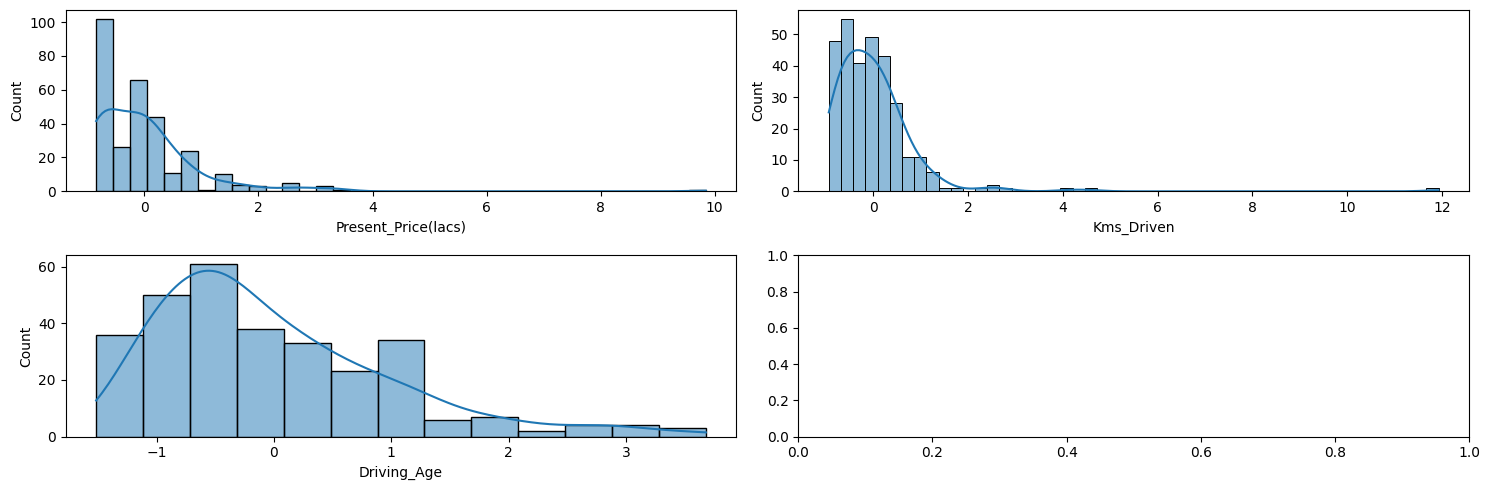

In [24]:
# Distribution after transformation
num_cols = ['Present_Price(lacs)', 'Kms_Driven', 'Driving_Age']

fig, axes = plt.subplots(2, 2, figsize = (15, 5))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the numerical columns and create distribution plots
for i in range(len(num_cols)):
  # Use sns.histplot for distribution plots
    sns.histplot(X_nnorm[num_cols[i]], ax = axes[i], kde = True)

plt.tight_layout()
plt.show()

In [25]:
# X modifiy
X = X.drop(columns = ['Driving_Age', 'Present_Price(lacs)', 'Kms_Driven'], axis = 1)
X.head()

,Fuel_Type,Seller_Type,Transmission,Past_Owners,Brand
0,2,0,1,0,36
1,1,0,1,0,39
2,2,0,1,0,18
3,2,0,1,0,42
4,1,0,1,0,38


In [26]:
X_num.head()

,Present_Price(lacs),Kms_Driven,Driving_Age
0,1.720979,10.203592,2.197225
1,2.255493,10.668955,2.302585
2,2.287471,8.839277,1.791759
3,1.423108,8.556414,2.484907
4,1.927164,10.656082,2.197225


**Concat Categorical and transformed Numerical features**

In [27]:
X = pd.concat([X, X_nnorm], axis = 1)
X.head()

,Fuel_Type,Seller_Type,Transmission,Past_Owners,Brand,Present_Price(lacs),Kms_Driven,Driving_Age
0,2,0,1,0,36,-0.236215,-0.256224,-0.128897
1,1,0,1,0,39,0.221505,0.155911,0.217514
2,2,0,1,0,18,0.257427,-0.773969,-1.168129
3,2,0,1,0,42,-0.403079,-0.817758,0.910335
4,1,0,1,0,38,-0.087890,0.141743,-0.128897


**Feature Selection**

Using ExtraTreesRegressor we can find out the importance of the features and based on that we can make the prediction. Using the 6 most important features from ETR we get a 1% increase in evaluation from 84 to 85.

In [47]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

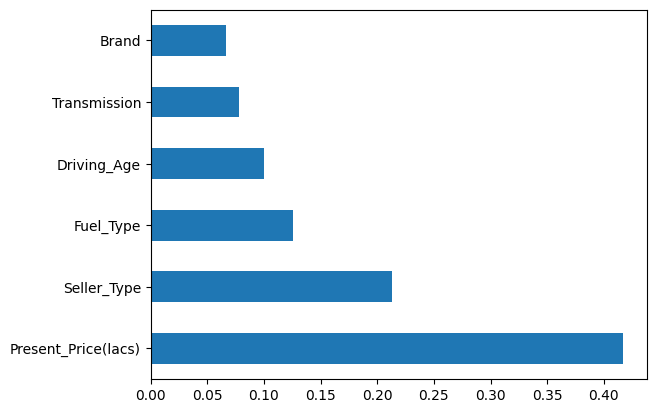

In [51]:
feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.nlargest(8).plot(kind = 'barh')
plt.show()

**Selected Features**

In [30]:
columns = ['Present_Price(lacs)', 'Seller_Type', 'Fuel_Type', 'Driving_Age', 'Transmission', 'Brand']

In [31]:
# Select The most important 6 features
X = X[columns]
X.head()

,Present_Price(lacs),Seller_Type,Fuel_Type,Driving_Age,Transmission,Brand
0,-0.236215,0,2,-0.128897,1,36
1,0.221505,0,1,0.217514,1,39
2,0.257427,0,2,-1.168129,1,18
3,-0.403079,0,2,0.910335,1,42
4,-0.087890,0,1,-0.128897,1,38


In [32]:
X.shape

(301, 6)

**Model Creation/Evaluation**

**Applying regression models**
*   Linear Regression
*   Ridge Regression
*   Lasso Regression
*   Random Forest Regression
*   Gradient Boosting regression

In [33]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

(240, 6) (61, 6)


In [34]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [35]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train, y_train)

    # R2 score of the train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train, y_pred_train)
    R2_train.append(round(R2_train_model, 2))

    # R2 score of the test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model, 2))

    # R2 mean of train set using Cross-validation
    cross_val = cross_val_score(model, X_train, y_train, cv = 5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean, 2))

    # Printing results
    print("Train R2-score :", round(R2_train_model, 2))
    print("Test R2-score :", round(R2_test_model, 2))
    print("Train CV scores :", cross_val)
    print("Train CV mean :", round(cv_mean, 2))

    # Plotting Graphs
    # Residual Plot of train data
    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train), hist = False, ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()

**Linear Regression**

Train R2-score : 0.88
Test R2-score : 0.85
Train CV scores : [0.89659161 0.85143791 0.78379252 0.82616114 0.90310963]
Train CV mean : 0.85


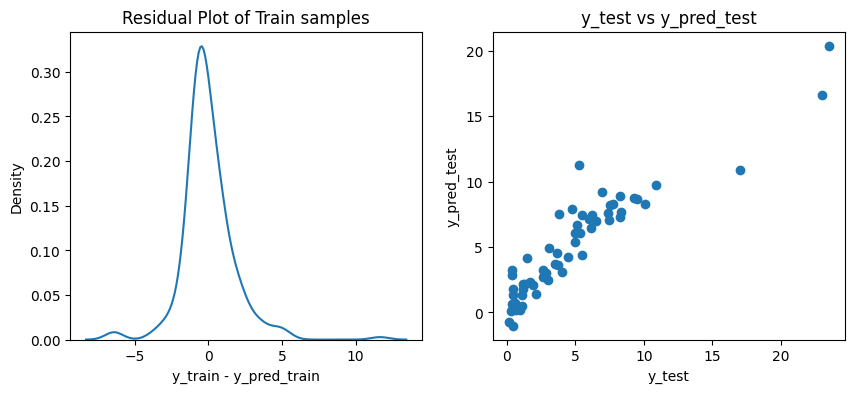

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr, "Linear_regressor.pkl")

**Ridge**

Train R2-score : 0.88
Test R2-score : 0.85
Train CV scores : [0.89314166 0.87236613 0.7769925  0.82186373 0.89771774]
Train CV mean : 0.85


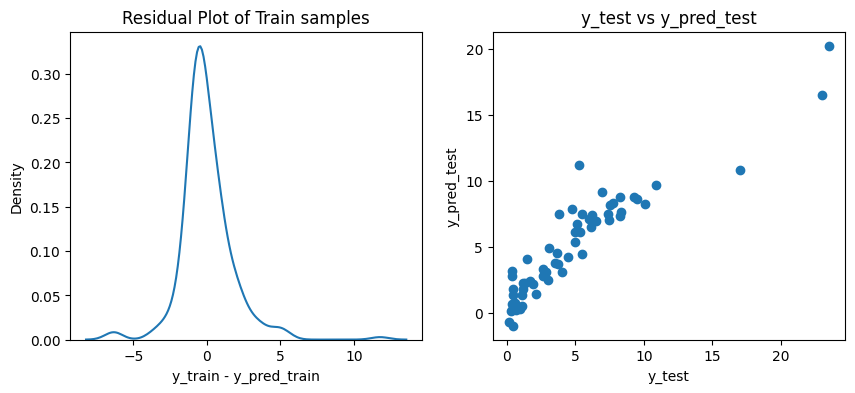

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()

# Range of alpha
alpha = np.logspace(-3, 3, num = 14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha = alpha))

car_pred_model(rg_rs, "ridge.pkl")

**Lasso**

Train R2-score : 0.88
Test R2-score : 0.85
Train CV scores : [0.89603911 0.85093507 0.78383631 0.82613506 0.90315737]
Train CV mean : 0.85


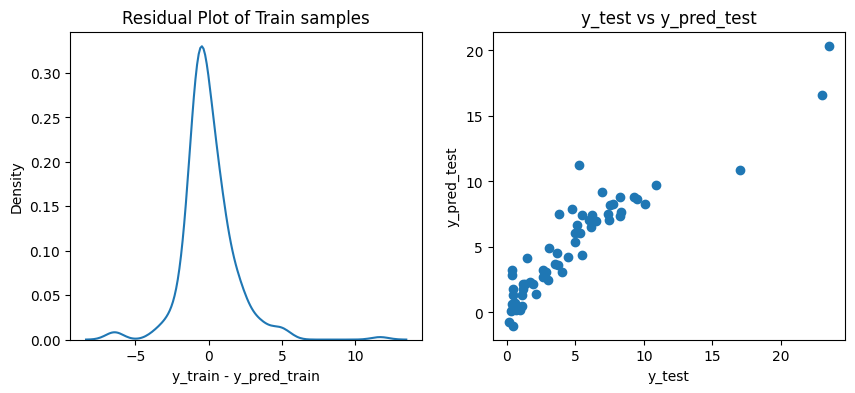

In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
ls = Lasso()
# Range for alpha
alpha = np.logspace(-3, 3, num = 14)
ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha = alpha))
car_pred_model(ls_rs, "lasso.pkl")

**Random Forest**

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
# Number of trees in Random forest
n_estimators = list(range(500, 1000, 100))
# Maximum number of levels in a tree
max_depth = list(range(4, 9, 4))
# The Minimum number of samples required to split an internal node
min_samples_split = list(range(4, 9, 2))
# The minimum number of samples required to be at a leaf node.
min_samples_leaf = [1, 2, 5, 7]
# Number of features to be considered at each split
max_features = ['auto','sqrt']
# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.92
Test R2-score : 0.93
Train CV scores : [0.85966748 0.74269128 0.6954784  0.82814072 0.93719461]
Train CV mean : 0.81


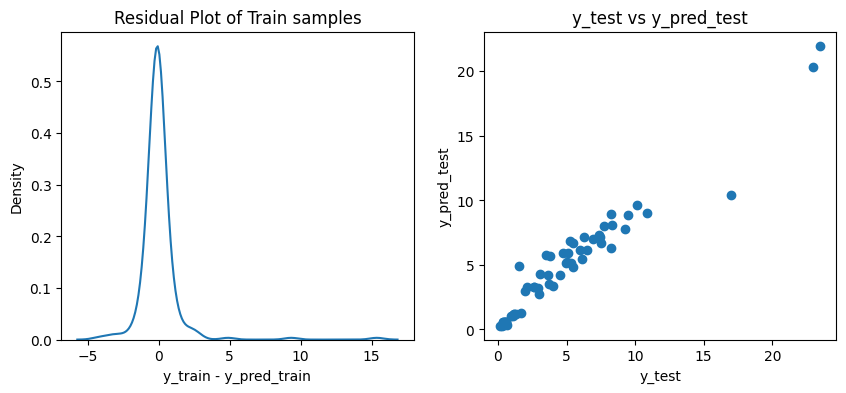

In [40]:
car_pred_model(rf_rs, 'random_forest.pkl')

In [41]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=700)


**Gradient Boosting**

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
gb = GradientBoostingRegressor()
# The rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# The number of trees in Gradient boosting
n_estimators = list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth = list(range(4, 9, 4))
# The minimum number of samples required to split an internal node
min_samples_split = list(range(4, 9, 2))
# The minimum number of samples is required to be at a leaf node.
min_samples_leaf = [1, 2, 5, 7]
# Number of features to be considered at each split
max_features = ['auto', 'sqrt']
# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.97
Train CV scores : [0.94857863 0.70155425 0.78741804 0.92172681 0.95456416]
Train CV mean : 0.86


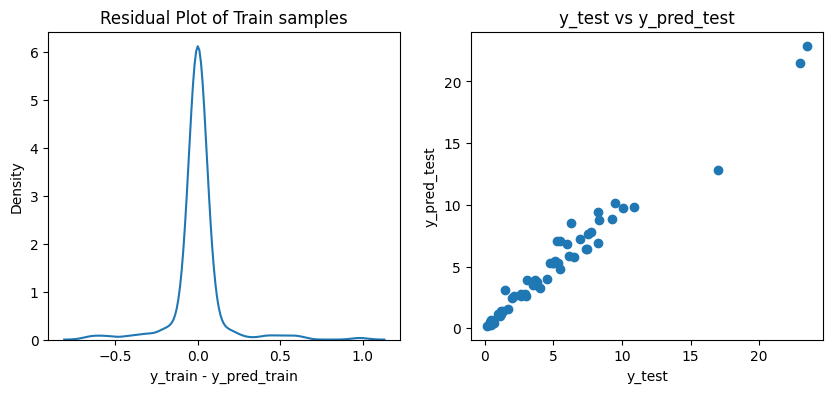

In [43]:
car_pred_model(gb_rs, "gradient_boosting.pkl")

In [44]:
Technique = ["LinearRegression", "Ridge", "Lasso", "RandomForestRegressor", "GradientBoostingRegressor"]
results = pd.DataFrame({'Model': Technique, 'R Squared(Train)': R2_train, 'R Squared(Test)': R2_test, 'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.85,0.85
1,Ridge,0.88,0.85,0.85
2,Lasso,0.88,0.85,0.85
3,RandomForestRegressor,0.92,0.93,0.81
4,GradientBoostingRegressor,1.00,0.97,0.86
